## Acronyms: 
**LR**: Logistic Regression<br>
**RF**: Random Forest<br>
**KNN**: K-Nearest Neighbours<br>
**STC**: Self Training Classifier<br>
**STC-T-BE**: STC(criterion = threshold, threshold = 75%, base estimator = BE).<br>
**STC-K-BE**: STC(criterion = k_best,  k = 2.5% * n, base estimator = BE). Where n is the number of points in the data set.<br>
See https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.SelfTrainingClassifier.html for more details.<br>
**f1-score ratio**: For a STC(base estimator = BE) we define the f1-score ratio as f1(STC) / f1(BE). The purpose of this metric is to show the improvement (or degradation) of the self training classifier relative to its base estimator.
    
## Intro

The goal is to test, when in the presence of unlabeled data, if it is better to use a self training classifier or a regular classifier. 

This is done by comparing the performance of LR, RF and KNN with their self training extensions as more and more of the training data is intentionally unlabeled. In particular, we look at the distribution of the f1-scores (for the regular classifiers) and the distribution of the f1-score ratios (for the self training classifiers) when 10%, 20%, ..., 90% of the training data is unlabelled. 
    
We look at the f1-scores of the base estimators because self training classifiers will only have potential if the  base estimators decrease in performance.
We look at the f1-score ratios of the self training classifiers because we are interested in seeing the relative improvement of self training.


### Psuedo Code

$D =$ dataset <br>
$M =$ [LR, RF, KNN, STC-T-LR, STC-T-RF, STC-T-KNN, STC-K-LR, STC-K-RF, STC-K-KNN]  
    
For $i$ in 1,2,...,30:

> 80% of $D$ is randomally sampled (stratified) to create training set $Tr_i$ with the remaining 20% as the test set
    $Te_i$. <br>
For $j$ in 10,20,...,90: <br>
> > $j$% of $Tr_i$ is randomally unlabelled. <br>
> > For $m$ in $M$:
> > > $m$ is trained on $Tr_i$ (if semi supervised, unlabeled data is included otherwise it is dropped)
            and validated on $Te_i$, resulting in an f1-score $ f_{ijm} $.
      
The f1-scores are grouped over $i$ yielding an emperical distribution of the f1-scores for each model and percentage of missing data: $f_{jm} \sim \{f_{ijm}\}_{i=1}^{30}$.

## Experiment Results

In [1]:
import pandas as pd

from preprocess import preprocessData
from runExperiment import runExperiment

nrows:  900
n_features (post encoding):  6
target distribution:  0    450
1    450
Name: Class, dtype: int64


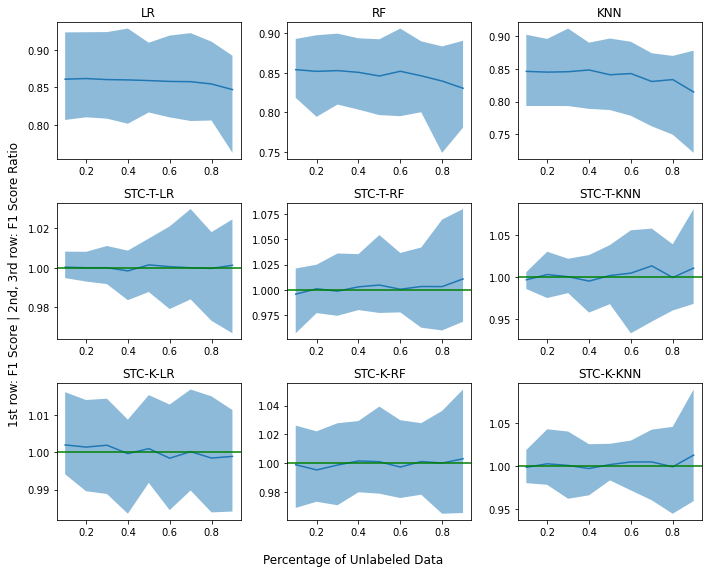

In [2]:
# Data set reference:
# [1] Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods, Gazi Journal of Engineering Sciences (CINAR I., KOKLU M. & TASDEMIR S., 2020)

X, y = preprocessData(pd.read_csv('/datasets/raisin.csv'),
              numeric_features = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter'],
              categorical_features = [],
              target = 'Class',
              label_dic = {'Kecimen': 0, 'Besni': 1})

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary')
experiment.fit(X,y)
experiment.plot()

The base estimators only slightly decrease in average performance. As such it cannot be expected for the STCs to improve signifcantly on average performance, which is exactly what we see. The performance of the STCS are also highly variable.

nrows:  150
n_features (post encoding):  4
target distribution:  0    50
1    50
2    50
Name: class, dtype: int64


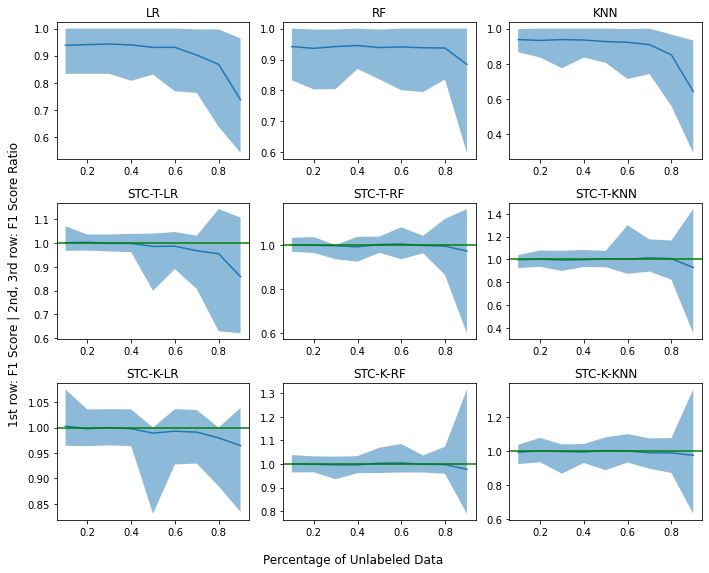

In [3]:
# Data set reference:
# [2] UCI Machine Learning Repository (Dua, D. & Graff, C. 2019)

X, y = preprocessData(pd.read_csv('/datasets/iris.csv'),
              numeric_features = ['sepal length','sepal width', 'petal length', 'petal width'],
              categorical_features = [],
              target = 'class',
              label_dic = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'macro')
experiment.fit(X,y)
experiment.plot()

We have a more interesting case here where the base estimators decrease in performance. However it seems the STCs do not make up for this decrease.

nrows:  1473
n_features (post encoding):  24
target distribution:  1    629
3    511
2    333
Name: contraceptive method, dtype: int64


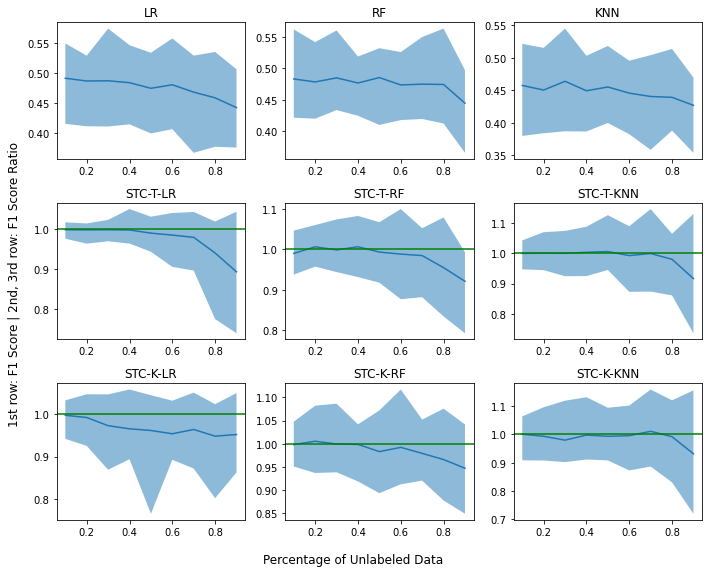

In [4]:
# Data set reference:
# [3] UCI Machine Learning Repository (Dua, D. & Graff, C. 2019)

X, y = preprocessData(pd.read_csv('/datasets/cmc.csv'),
              numeric_features = ['wife age', 'number of children'],
              categorical_features = ['wife education', 'husband education', 'wife religion', 'wife working',
                                     'husband occupation', 'standard of living', 'media exposure'],
              target = 'contraceptive method',
              label_dic = None)

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'macro')
experiment.fit(X,y)
experiment.plot()

The base estimators are once again decreasing in performance and the STCs are not making up. In fact the STCs are performing even worse as the base estimators get weaker.

nrows:  1941
n_features (post encoding):  31
target distribution:  0    1751
1     190
Name: Z_Scratch, dtype: int64


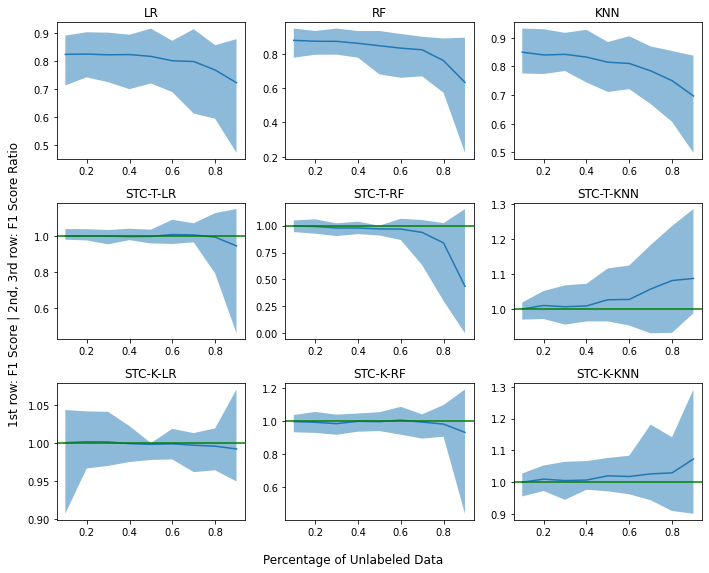

In [6]:
# Data set reference:
# [4] Steel Plates Faults (Research Center of Sciences of Communication, 2010)

X, y = preprocessData(pd.read_csv('/datasets/faults.csv', sep = '\t'),
              numeric_features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
                                 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
                                 'Length_of_Conveyer', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
                                 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index',
                                 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas'],
              categorical_features = ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index'],
              target = 'Z_Scratch',
              label_dic = None)

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary')
experiment.fit(X,y)
experiment.plot()

The base estimators decrease in performance. Interestingly only KNN seems to benefit from self training. In fact while the performance gain is still quite inconsistent, when 90% of the data is missing the mean performance gain is actually significant (around a 10% increase on the base estimator f1 score of 0.7). Other than that however, self training is not beneficial.

nrows:  1941
n_features (post encoding):  31
target distribution:  0    1539
1     402
Name: Bumps, dtype: int64


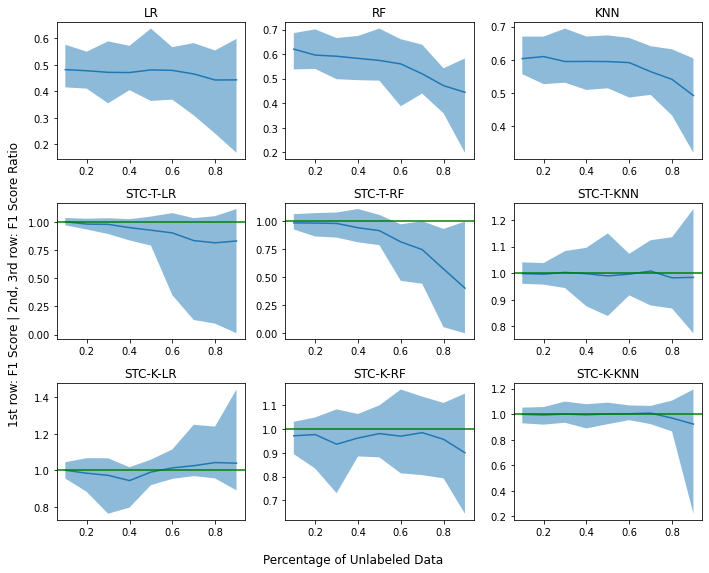

In [7]:
# Data set reference:
# [4] Steel Plates Faults (Research Center of Sciences of Communication, 2010)

X, y = preprocessData(pd.read_csv('/datasets/faults.csv', sep = '\t'),
              numeric_features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
                                 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
                                 'Length_of_Conveyer', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
                                 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index',
                                 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas'],
              categorical_features = ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index'],
              target = 'Bumps',
              label_dic = None)

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary')
experiment.fit(X,y)
experiment.plot()

On average self training is not beneficial. In the case of STC-T, RF is significantly detrimental.

nrows:  4839
n_features (post encoding):  5
target distribution:  1    4578
0     261
Name: class, dtype: int64


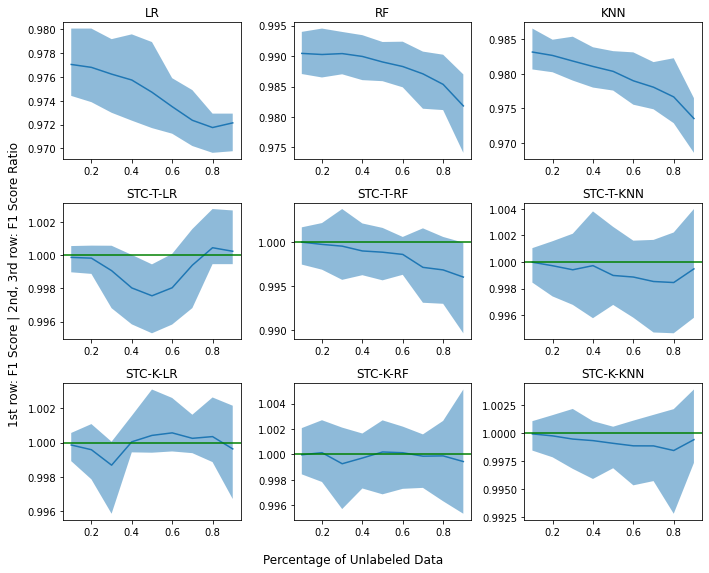

In [8]:
# Data set reference:
# [5] A hybrid pansharpening approach and multiscale object-based image analysis for mapping diseased pine and oak trees (Johnson B., Tateishi R. & Hoan, N., 2013)

X, y = preprocessData(pd.read_csv('/datasets/wilt.csv', sep = '\t'),
              numeric_features = ['GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan'],
              categorical_features = [],
              target = 'class',
              label_dic = {'w': 0, 'n': 1})

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary')
experiment.fit(X,y)
experiment.plot()

On average self training is not beneficial.

nrows:  303
n_features (post encoding):  132
target distribution:  1    216
0     87
Name: Cath, dtype: int64


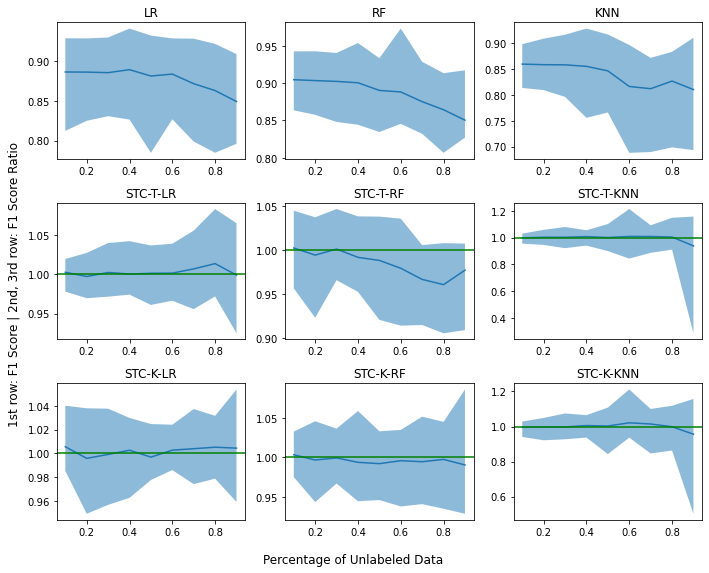

In [13]:
# Data set reference:
# [6] A data mining approach for diagnosis of coronary artery disease (R. Alizadehsani et al 2013)

X, y = preprocessData(pd.read_csv('/datasets/Z-Alizadeh sani.csv', sep = '\t'),
              numeric_features = ['Age', 'Weight', 'Length', 'BMI', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
                                 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE'],
              categorical_features = ['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA',
                                      'Airway Disease', 'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
                                      'Weak Peripheral Pulse', 'Lung Rales', 'Systolic Murmur', 'Diastolic Murmur',
                                     'Typical Chest Pain', 'Dyspnea', 'Function Class', 'Atypical', 'Nonanginal',
                                     'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion',
                                     'LVH', 'Poor R Progression', 'BBB', 'Region RWMA', 'VHD' ],
              target = 'Cath',
              label_dic = {'Normal': 0, 'Cad': 1})

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary')
experiment.fit(X,y)
experiment.plot()

On average self training is not beneficial. In the case of STC-T, RF is more likely to be detrimental.

nrows:  756
n_features (post encoding):  756
target distribution:  1    564
0    192
Name: class, dtype: int64


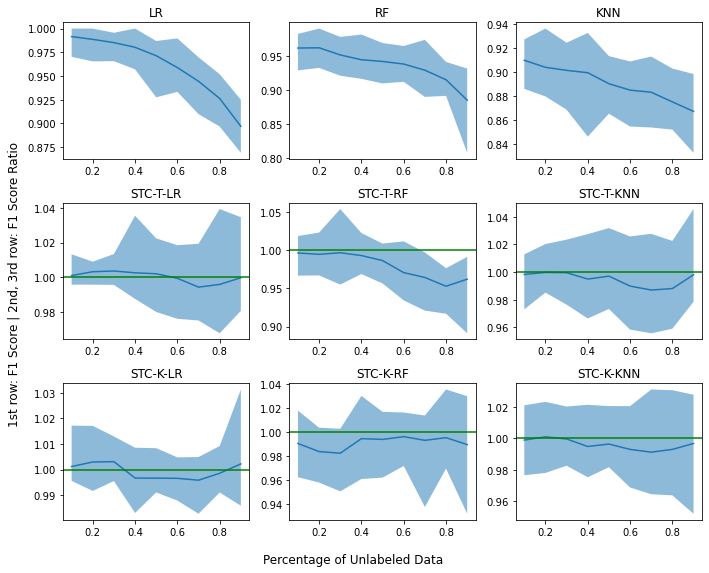

In [10]:
# Data set reference
# [7] A comparative analysis of speech signal processing algorithms for Parkinson's disease classification and the use of the tunable Q-factor wavelet transform. (Sakar C.O., Serbes G., Gunduz A., Tunc H.C., Nizam H., Sakar B.E., Tutuncu M., Aydin T., Isenkul M.E. & Apaydin H., 2018)

X, y = preprocessData(pd.read_csv('/datasets/pd_speech_features.csv', sep = '\t'),
              numeric_features = 'remaining',
              categorical_features = ['gender'],
              target = 'class',
              label_dic = None)

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary')
experiment.fit(X,y)
experiment.plot()

On average self training is not beneficial. In the case of STC-T, RF is more likely to be detrimental.

nrows:  476
n_features (post encoding):  166
target distribution:  0    269
1    207
Name: class, dtype: int64


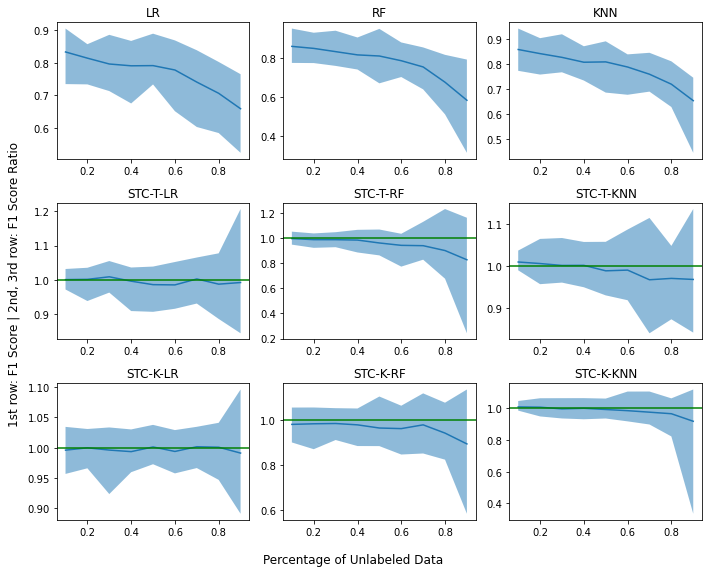

In [11]:
# Data set reference
# [8] UCI Machine Learning Repository (Dua, D. & Graff, C. 2019)

X, y = preprocessData(pd.read_csv('/datasets/musk.csv'),
              numeric_features = ['f' + str(i) for i in range(1,167)],
              categorical_features = [],
              target = 'class',
              label_dic = None)

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary')
experiment.fit(X,y)
experiment.plot()

On average self training is not beneficial. For RF and KNN it is more likely to be detrimental.

nrows:  4601
n_features (post encoding):  58
target distribution:  0    2788
1    1813
Name: spam, dtype: int64


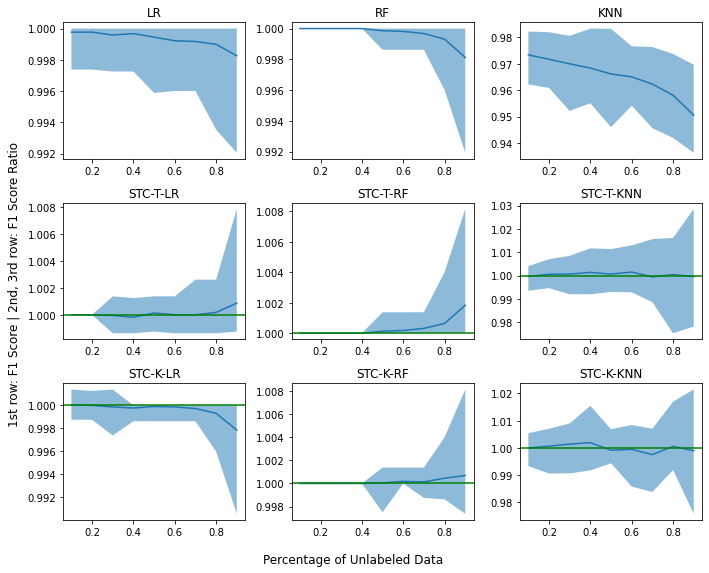

In [12]:
# Data set reference
# [9] UCI Machine Learning Repository (Dua, D. & Graff, C. 2019)

X, y = preprocessData(pd.read_csv('/datasets/spambase.csv'),
              numeric_features = 'remaining',
              categorical_features = [],
              target = 'spam',
              label_dic = None)

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary')
experiment.fit(X,y)
experiment.plot()

Negligable improvement from self training and it only took a near perfect classifier.

## Conclusion

With the small datasets experimented on self training was, on average, NOT beneficial. The only where we noticed a significant improvement was on a KNN.

Furthermore, self training with a threshold on a random forest was noticeably worse than the base random forest. This may be due to the RF models being poorly calibrated.

